<a href="https://colab.research.google.com/github/Prakhar967/Unsupervised-learning-clustering/blob/main/Bussiness_Case_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objective :
### As a data scientist we have to do company profiling and job position profiling from scaler database so that we may guide our student accordingly in their journey of finding their Job. This will also help Scaler to learn more about strategy that can attract more learners and also build trust.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_colwidth', None)

In [ ]:
from google.colab import drive

In [ ]:
File_path = '/content/drive/MyDrive/DATASET and TABLEAU DASHBOARD/DATASET/scaler_clustering.csv'

In [ ]:
df = pd.read_csv(File_path)

In [ ]:
df

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c050c0618caea697c87af,2016.00,1100000,Other,2020.00
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c100a9661a92bdcc0407b,2018.00,449999,FullStack Engineer,2019.00
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e90fd66c9df6b37b9059,2015.00,2000000,Backend Engineer,2020.00
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58a44274d5d6876dfec7,2017.00,700000,Backend Engineer,2019.00
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520214b31b95211adb095,2017.00,1400000,FullStack Engineer,2019.00
...,...,...,...,...,...,...,...
205838,206918,vuurt xzw,70027b728c8ee901fe979533ed94ffda97be08fc23f33b6e8d7cb06af04e0c05,2008.00,220000,NaN,2019.00
205839,206919,husqvawgb,7f7292ffad724ebbe9ca860f515245368d714c84705b4264c8e881b4a61cdb53,2017.00,500000,NaN,2020.00
205840,206920,vwwgrxnt,cb25cc7304e9a24facda7f5567c7922ffc48e3d5d6018c8852b58da2fde5e00c,2021.00,700000,NaN,2021.00
205841,206921,zgn vuurxwvmrt,fb46a1a2752f5f652ce634f6178d0578ef6995ee59f6c819ec41f6af222a8699,2019.00,5100000,NaN,2019.00


## Columns Description

 1. **Unnamed 0**: The index of the dataset.
 2. **Email_hash**: An anonymized identifier representing the email of the learner.
 3. **Company_hash**: An anonymized identifier indicating the current employer of the
 learner.
 4. **orgyear**: Represents the year the learner began employment at the current
 company.
 5. **CTC**: Current Compensation to the Company (CTC) of the learner.
 6. **Job_position**: Represents the job profile or role of the learner within their
 company.
 7. **CTC_updated_year**: The year in which the learner's CTC was most recently
 updated. This could be due to yearly increments, promotions, or other factors.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205843 entries, 0 to 205842
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        205843 non-null  int64  
 1   company_hash      205799 non-null  object 
 2   email_hash        205843 non-null  object 
 3   orgyear           205757 non-null  float64
 4   ctc               205843 non-null  int64  
 5   job_position      153279 non-null  object 
 6   ctc_updated_year  205843 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 11.0+ MB


In [ ]:
df.drop('Unnamed: 0',axis=1,inplace=True)

### ReGex Expression for removing special characters

In [ ]:
import re

In [ ]:
df['company_hash'] = df['company_hash'].apply(lambda x: re.sub('[^A-Za-z0-9 ]+', '', str(x)))
df['email_hash'] = df['email_hash'].apply(lambda x : re.sub('[^A-Za-z0-9 ]+','',str(x)))

In [ ]:
df

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c050c0618caea697c87af,2016.00,1100000,Other,2020.00
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c100a9661a92bdcc0407b,2018.00,449999,FullStack Engineer,2019.00
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e90fd66c9df6b37b9059,2015.00,2000000,Backend Engineer,2020.00
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58a44274d5d6876dfec7,2017.00,700000,Backend Engineer,2019.00
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520214b31b95211adb095,2017.00,1400000,FullStack Engineer,2019.00
...,...,...,...,...,...,...
205838,vuurt xzw,70027b728c8ee901fe979533ed94ffda97be08fc23f33b6e8d7cb06af04e0c05,2008.00,220000,NaN,2019.00
205839,husqvawgb,7f7292ffad724ebbe9ca860f515245368d714c84705b4264c8e881b4a61cdb53,2017.00,500000,NaN,2020.00
205840,vwwgrxnt,cb25cc7304e9a24facda7f5567c7922ffc48e3d5d6018c8852b58da2fde5e00c,2021.00,700000,NaN,2021.00
205841,zgn vuurxwvmrt,fb46a1a2752f5f652ce634f6178d0578ef6995ee59f6c819ec41f6af222a8699,2019.00,5100000,NaN,2019.00


In [ ]:
df.shape

(205843, 6)

we have nearly 2 lakh rows and 6 columns

## Unique Values

In [ ]:
df['orgyear'].nunique()     # 77 unique values in the dataset in orgyear column

77

In [ ]:
df['job_position'].nunique()    #1016 unique values in the job_position column

1016

In [ ]:
df['ctc'].nunique()     # 3360 unique values in the ctc column

3360

In [ ]:
df['ctc_updated_year'].nunique()    # 7 unique values in the ctc_updated_year column

7

# Missing Value Treatment

In [ ]:
(df.isna().sum() / df.shape[0]) * 100

,0
company_hash,0.00
email_hash,0.00
orgyear,0.04
ctc,0.00
job_position,25.54
ctc_updated_year,0.00


We can clearly see that we have 86 missing values in orgyear and 52564 in job_position

In [ ]:
df['job_position'] = df['job_position'].fillna('unknown')

Since missing values in job position in about 25% of the entire data which is very huge so filling it with 'unknown' seems to be good choice as compared to mode method imputation

### correcting the data for 'orgyear'

In [ ]:
valid_min , valid_max  = 1900 , 2025

In [ ]:
df['orgyear']  = df['orgyear'].mask((df['orgyear'] < valid_min) | (df['orgyear'] > valid_max))

since missing values in 'orgyear' colummn is very low i.e. less than 0.1% hence median approach and KNN imputation approach works in a similar way. Hence i am going to opt for median approach as it is fast and efficient.

In [ ]:
df['orgyear'] = df['orgyear'].fillna(df['orgyear'].median()).round().astype(int)

### For 'ctc' value sanity check

In [ ]:
df['ctc'].max()

1000150000

In [ ]:
df['ctc'].min()

2

These salaries are quite unrealistic therefore i have to correct this also

In [ ]:
low_salary = 100000
high_salary = 10000000

In [ ]:
df['ctc'] = df['ctc'].mask((df['ctc'] < low_salary) | (df['ctc'] > high_salary))

In [ ]:
df.isna().sum()/df.shape[0]*100

,0
company_hash,0.00
email_hash,0.00
orgyear,0.00
ctc,3.30
job_position,0.00
ctc_updated_year,0.00


These unrealistic salaries constitute  more than 6% of the entire data, so i have set some realistic bounds at 2LPA (minimum) and 60LPA (maximum)

### KNN Imputation

In [ ]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

In [ ]:
cols = ['orgyear','ctc','ctc_updated_year']

In [ ]:
x = df[cols]

In [ ]:
impute = KNNImputer(n_neighbors=5)

In [ ]:
scaler = StandardScaler()

In [ ]:
x_scaled = scaler.fit_transform(x)

In [ ]:
x_imputed = impute.fit_transform(x_scaled)

In [ ]:
x_final = scaler.inverse_transform(x_imputed)

In [ ]:
x_final = pd.DataFrame(x_final,columns=cols)

In [ ]:
df[cols] = x_final[cols]

For imputing missing values in 'orgyear' , i considered both median and KNN imputation . Since the proportion of missing values was extremely small , both methods gave comparable results. However i proceeded with KNN imputation to align with the project's prescribes techniques , while noting that its impact on clustering outcomes is minimal due to very low rate of missingness

### Job_position sanity check

In [ ]:
# Extract unique suspicious job positions that have NO letters
suspicious_jobs = df.loc[~df['job_position'].str.contains(r'[A-Za-z]', regex=True, na=False), 'job_position'].unique()
print("Suspicious job positions:", suspicious_jobs)


Suspicious job positions: ['.' '857628' '7' '896651' '91' '.7' '737' '..' '7033771951']


In [ ]:
df = df[~df['job_position'].isin(suspicious_jobs)]

In [ ]:
invalid_jobs = [
    "Sr.", "Toyota", "Can't reveal", "no Job", "Not Employed", "Null", "null", "NULL",
    "Kam", "A Group Chat Application", "Pop", "Na", "na", "NA",
    "Q", "ENO", "PAT", "So", "X", "No", "ays", "Jharkhand", "BA", "N", "None", "none",
    "Unemployed", "unemployed", "Bengaluru", "Zomato", "H", "New Graduate"
]

df = df[~df['job_position'].isin(invalid_jobs)].copy()

print("Rows after cleaning:", df.shape[0])

Rows after cleaning: 205808


## Duplicacy check

In [ ]:
df.duplicated().sum()

np.int64(41)

In [ ]:
df = df.drop_duplicates(keep = 'last')

## Outlier Treatment

In [ ]:
df.columns

Index(['company_hash', 'email_hash', 'orgyear', 'ctc', 'job_position',
       'ctc_updated_year'],
      dtype='object')

### For 'orgyear'

In [ ]:
num_cols = ['orgyear','ctc','ctc_updated_year']

<Axes: ylabel='orgyear'>

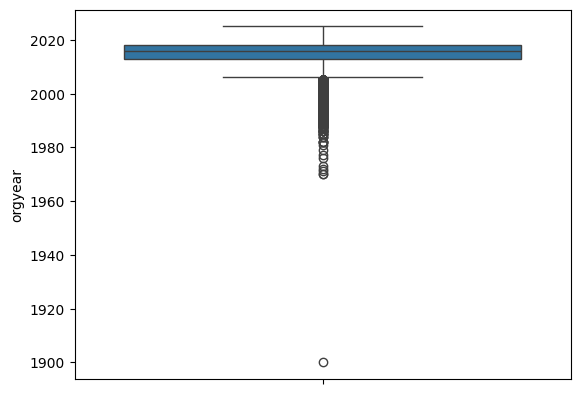

In [ ]:
sns.boxplot(df['orgyear'])

In [ ]:
higher = df['orgyear'].quantile(.01)
lower = df['orgyear'].quantile(.99)

In [ ]:
df['orgyear'] = df['orgyear'].clip(lower,higher).round().astype(int)

<Axes: ylabel='orgyear'>

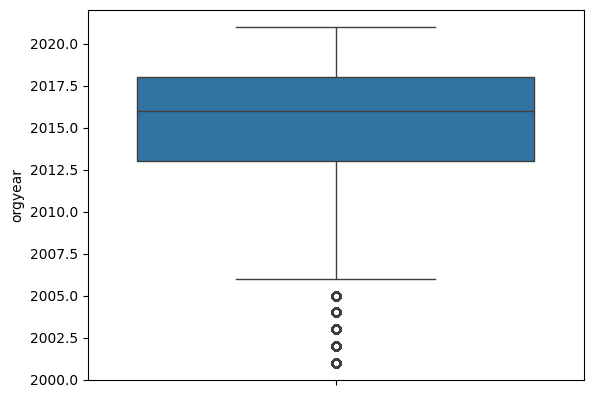

In [ ]:
sns.boxplot(df['orgyear'])

### for ctc_updated_year

<Axes: ylabel='ctc_updated_year'>

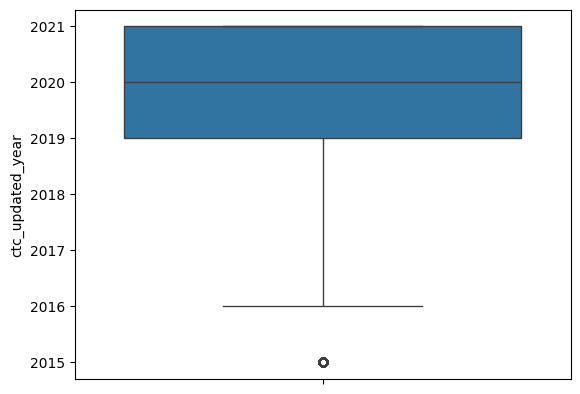

In [ ]:
sns.boxplot(df['ctc_updated_year'])

### For 'ctc'

<Axes: ylabel='ctc'>

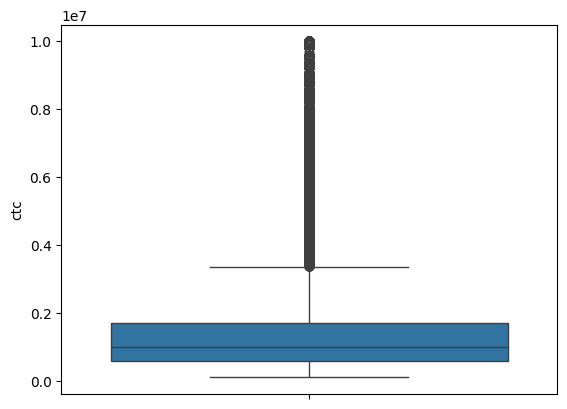

In [ ]:
sns.boxplot(df['ctc'])

CTC are naturally right skewed - most people earn within a common band , while a few earn extremely high packages. If we use raw CTC values in clustering, those few extremes salaries would dominate the results pulling clusters away from the majority. To solve this i applied log transformation on ctc . this compresses extreme values , reduce skewness and ensures clustering captures meaningful patterns across all learners not just the effect of very high learner. And also i will store in some other variable so that i can perform univariate and bivariate analysis and also clustering problem.

In [ ]:
df_cluster = df.copy()    # for clustering problem

In [ ]:
df_cluster['ctc'] = np.log1p(df_cluster['ctc'])       # Applied log transformation

<Axes: ylabel='ctc'>

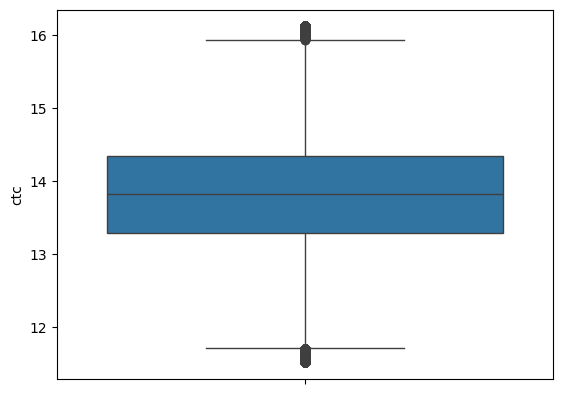

In [ ]:
sns.boxplot(df_cluster['ctc'])

Even after log transformation, statistical outliers are visible in the boxplot. However, since all values are within the logical range of 1 lakh to 1 crore, these outliers represent real salary extremes rather than errors. Therefore, they were retained for clustering to preserve meaningful variation.

# Describing the Dataset

In [ ]:
df.describe()

,orgyear,ctc,ctc_updated_year
count,205767.00,205767.00,205767.00
mean,2015.15,1321522.31,2019.63
std,4.06,1170509.02,1.33
min,2001.00,100000.00,2015.00
25%,2013.00,590000.00,2019.00
50%,2016.00,1000000.00,2020.00
75%,2018.00,1700000.00,2021.00
max,2021.00,10000000.00,2021.00


1. Most learners in the dataset have origin years around 2015 to 2016, with recent CTC updates mostly after 2019.
2. The average CTC is approx 13.2 LPA, but the spread is very high (std approx 11.7 L), showing large variation among learners.
3. The median CTC is 10 LPA, while the maximum reaches 1 crore, indicating a few high earners pulling up the mean.
4. Overall, the data suggests a young workforce (post 2015 joiners) with a wide salary distribution from entry-level to very high earners.

# Feature Engineering

In [ ]:
df['years_of_experience'] = 2025-df['orgyear']
df_cluster['years_of_experience'] = 2025-df_cluster['orgyear']

In [ ]:
summary = df.groupby(['company_hash', 'job_position', 'years_of_experience'])['ctc'].agg(['mean', 'median', 'max', 'min', 'count']).reset_index()

In [ ]:
df[df['company_hash'] == '0000']

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience
197540,0000,b3f3bb98cbca4b1ce5dfd5abb4e500ce6f6b66288a5202ead573964201d24b24,2017,300000.00,Other,2020.00,8


In [ ]:
df[df['company_hash'] == '0']

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience
2940,0,e80f7c9c26012bfdeca551e2b8642a93e45939d3d677c5287b50ef620d1e73ab,2020,100000.00,unknown,2020.00,5
16824,0,e80f7c9c26012bfdeca551e2b8642a93e45939d3d677c5287b50ef620d1e73ab,2020,100000.00,Other,2020.00,5


As we can see that there are ceratin rows where 0 , 0000 , 1 ,..etc number of records were also present and hash values are alphanumeric in nature and do not appear as pure integer , these entries were identified as invalid placeholders rather than true company identifiers . To prevent these values from creating misleading groups during analysis i have changed them into 'unknown'

In [ ]:
df['company_hash'] = df['company_hash'].str.strip()
df_cluster['company_hash'] = df_cluster['company_hash'].str.strip()
mask_digits = df['company_hash'].str.fullmatch(r'\d+')
mask_digits_cluster = df_cluster['company_hash'].str.fullmatch(r'\d+')
df.loc[mask_digits, 'company_hash'] = 'unknown'
df_cluster.loc[mask_digits_cluster, 'company_hash'] = 'unknown'

## Mannual Clustering

### Company_hash, job_position, years_of_experience

In [ ]:
summary_1 = df.groupby(['company_hash', 'job_position', 'years_of_experience'])['ctc'].agg(['mean', 'median', 'max', 'min', 'count']).reset_index()

In [ ]:
df['ctc'] = pd.to_numeric(df['ctc'], errors='coerce')
keys = ['company_hash','job_position','years_of_experience']
df['mean_ctc_1'] = df.groupby(keys)['ctc'].transform('mean')
df['flag_designation'] = 2
df.loc[df['ctc'] < df['mean_ctc_1'], 'flag_designation'] = 1
df.loc[df['ctc'] > df['mean_ctc_1'], 'flag_designation'] = 3

### Job_position , Company_hash

In [ ]:
summary_2 = df.groupby(['company_hash', 'job_position'])['ctc'].agg(['mean', 'median', 'max', 'min', 'count']).reset_index()

In [ ]:
keys = ['company_hash','job_position']
df['mean_ctc_2'] = df.groupby(keys)['ctc'].transform('mean')
df['flag_class'] = 2
df.loc[df['ctc'] < df['mean_ctc_2'], 'flag_class'] = 1
df.loc[df['ctc'] > df['mean_ctc_2'], 'flag_class'] = 3

### Job_position

In [ ]:
summary_3 = df.groupby(['company_hash'])['ctc'].agg(['mean', 'median', 'max', 'min', 'count']).reset_index()

In [ ]:
keys = ['company_hash']
df['mean_ctc_3'] = df.groupby(keys)['ctc'].transform('mean')
df['flag_tier'] = 2
df.loc[df['ctc'] < df['mean_ctc_3'], 'flag_tier'] = 1
df.loc[df['ctc'] > df['mean_ctc_3'], 'flag_tier'] = 3

In [ ]:
df.drop('mean_ctc_1',axis=1,inplace=True)
df.drop('mean_ctc_2',axis=1,inplace=True)
df.drop('mean_ctc_3',axis=1,inplace=True)

I created flags to show if a person’s salary is below, equal to, or above the average in their group. These are useful for analysis, but I won’t use them in clustering because they don’t help the algorithm find natural patterns — they only repeat what we already know. I will keep them only for explaining the clusters later.

## categorizing CTC into bins

In [ ]:
bins = [100000,1000000,3000000,10000000]
labels = ['low','medium','high']

In [ ]:
df['ctc_category'] = pd.cut(df['ctc'], bins=bins , labels = labels , include_lowest=True)

# Bottom 10 employees of data science in each company earning less than their peers - Class 3

In [ ]:
df_class_3  = df[df['flag_class'] == 3]
df_class_3_data = df_class_3[df_class_3['job_position'] == 'Data Scientist']
df_class_3_data['median by company'] = df_class_3_data.groupby('company_hash')['ctc'].transform('median')
final_data = df_class_3_data[df_class_3_data['ctc']< df_class_3_data['median by company']]
bottom = df_class_3_data.sort_values(['company_hash','ctc']).groupby('company_hash',group_keys = False).head(10)
bottom.head(10)

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,flag_designation,flag_class,flag_tier,ctc_category,median by company
139680,1bs,6b01808bba4c2d50258b068274232251620630cb252a9c09804ea9f7bbef4d8f,2018,1100000.00,Data Scientist,2021.00,7,2,3,1,medium,1100000.00
90218,247vx,ddd9683a58865398ed934ee7faeb0825e515f2fe3cdaad2de8179e49b8030cd4,2008,2500000.00,Data Scientist,2019.00,17,2,3,3,medium,2550000.00
142703,247vx,9d2537610d57179230806bb77258f63c3134b8fde9aa3afc06f626a8097660e4,2010,2600000.00,Data Scientist,2015.00,15,2,3,3,medium,2550000.00
164833,3p ntwyzgrgsxto,af617ba27ec944771314f1c2d739b8208d2b3337800f8fc6e8ce4413ac4acbe0,2018,1800000.00,Data Scientist,2019.00,7,3,3,3,medium,1800000.00
13586,3rgi,c27536d2fe174089c62eca78e6e643baef88a6100c14047998368247ad0ea3ef,2010,1500000.00,Data Scientist,2021.00,15,2,3,3,medium,1605000.00
105831,3rgi,a372713f7d18e6f03b5b469cbd1ddb8145c2688597c52845ea633de5cad114ad,2014,1710000.00,Data Scientist,2019.00,11,2,3,3,medium,1605000.00
55286,abx exzvzwt ucn rna,312427e90421d0fa2ad12b47b33cac872026635e5340e6ef9a50a672d173f295,2016,1550000.00,Data Scientist,2019.00,9,2,3,3,medium,1550000.00
59357,adw ntwyzgrgsj,8a1e6a36db44c5ed8abe45ae0889577b2454e9025e7079f86afac016dadf46d6,2004,2350000.00,Data Scientist,2021.00,21,2,3,3,medium,2570000.00
55313,adw ntwyzgrgsj,74aaf8eb0536ecc80e60fbfd706c07075f768657b4ae84350923f77cc9ab0fb3,2008,2790000.00,Data Scientist,2019.00,17,2,3,3,medium,2570000.00
16167,adw ntwyzgrgsxto,4f5373e5c3b2201e47ec6fc48c6595ca45b2fcd7a1935a2e59922151a5465f2a,2017,1500000.00,Data Scientist,2021.00,8,2,3,3,medium,1730000.00


# Bottom 10 job positions earning less than most of the employees in the company - Tier 3

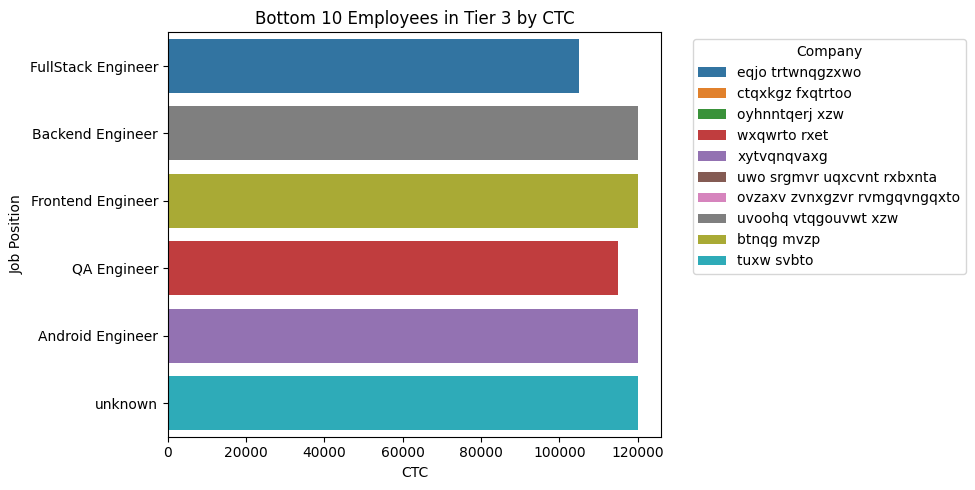

In [ ]:
tier3 = df[df['flag_tier'] == 3]
bottom10 = tier3.nsmallest(10, 'ctc')

plt.figure(figsize=(10,5))
sns.barplot(data=bottom10, x='ctc', y='job_position', hue='company_hash', dodge=False)
plt.title("Bottom 10 Employees in Tier 3 by CTC")
plt.xlabel("CTC")
plt.ylabel("Job Position")
plt.legend(title="Company", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

The chart highlights the bottom 10 employees in Tier 3 (lowest company-level CTC cluster).
Roles like FullStack Engineer, Backend Engineer, QA Engineer, Android Engineer, and Frontend Engineer are among the lowest earners in this tier.
Their CTC values cluster around the 1.0–1.2 lakh range, which is significantly below most peers within their companies.
This suggests that even within technical roles, some employees in Tier 3 are earning well below their company’s average benchmarks.



# UNIVARIATE ANALYSIS


### orgyear

<Axes: xlabel='orgyear', ylabel='count'>

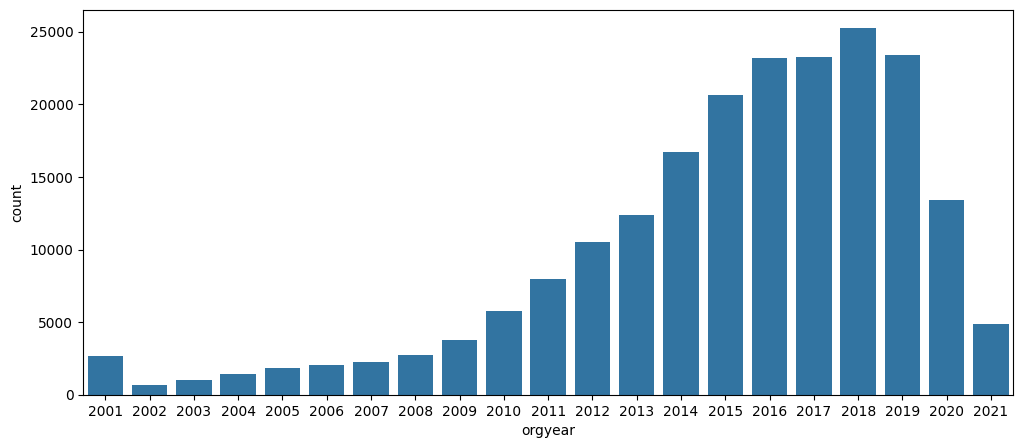

In [ ]:
plt.figure(figsize = (12,5))
sns.barplot(x=df['orgyear'].value_counts().index,y=df['orgyear'].value_counts())

This chart clearly shows that the distribution is Right Skewed , With most number of learners started their employability journey between 2016-2019

### ctc_updated year

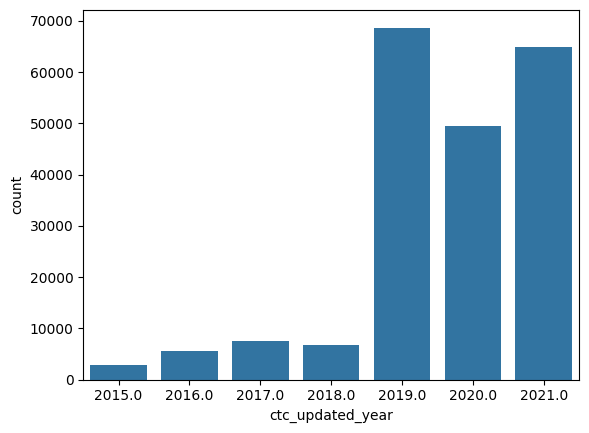

In [ ]:
sns.countplot(x="ctc_updated_year", data=df, order=sorted(df['ctc_updated_year'].unique()))
plt.show()

This chart tells us that most number of learners whose salary got updated was in the year 2019 and we also  found earlier that most people started their employbility journey within this period itself.

### Top 10 Job_ position

In [ ]:
# remove unknown from this dataset
jp = df[df['job_position'] != 'unknown']

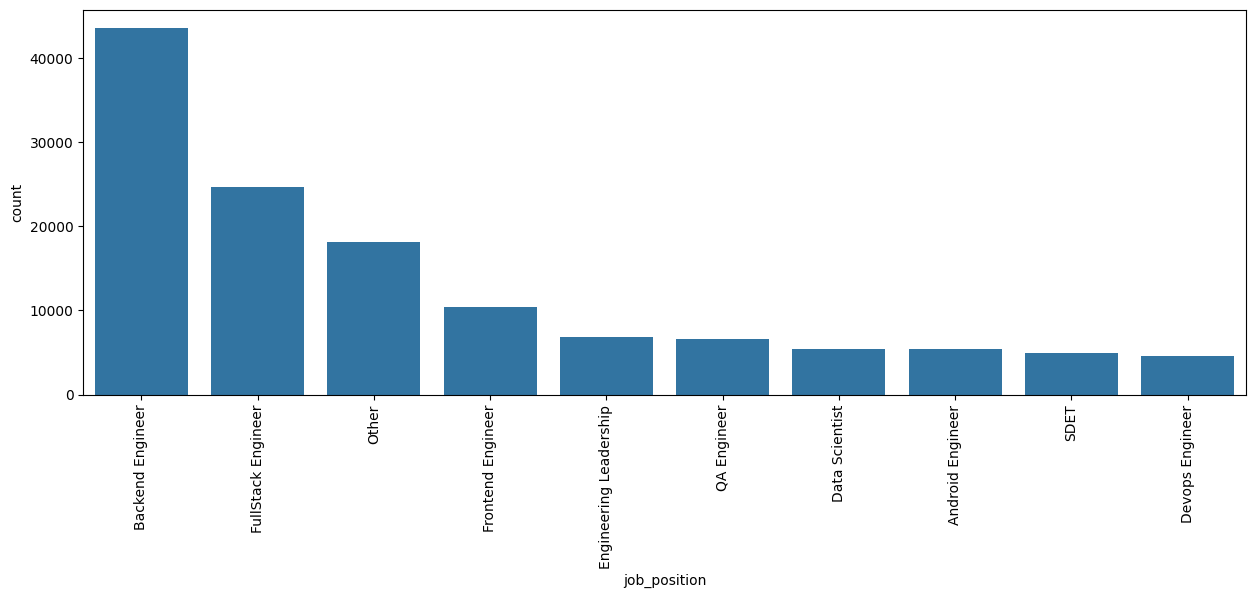

In [ ]:
plt.figure(figsize = (15,5))
sns.barplot(x = jp['job_position'].value_counts()[:10].index , y = jp['job_position'].value_counts()[:10])
plt.xticks(rotation=90)
plt.show()

This visualiztion helps us to understand that there are more learner related to Backened Engineer followed by Fullstack Engineer and so on. This also shows that maybe backend engineers , fullstack engineer are in high demand during this period and profession like data scientist are still evolving hence less number of learners are observed in this data.

### Which ctc_category dominates most in scaler

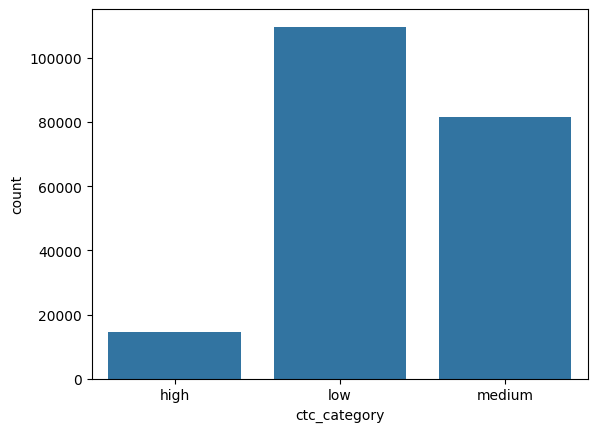

In [ ]:
sns.countplot(x="ctc_category", data=df, order=sorted(df['ctc_category'].unique()))
plt.show()

This visualiztion states that low_ctc_category which is betwwen 2 lakh to 10 lakh these category learners dominate most at scaler which clearly indicates that in this ever evolving world learners want to upskill themselves actively and also choosing full_stack_engineer as profession because this might be in high demand during that period.
low_category is followed by medium_category and at last high_ctc_category learners are there in the visualiztion. This is also a practical trend as in the starting of their journey of their profession lerners are very much enthusiastic and want to learn more so that they can upskill themselves fast.

### Years of experience

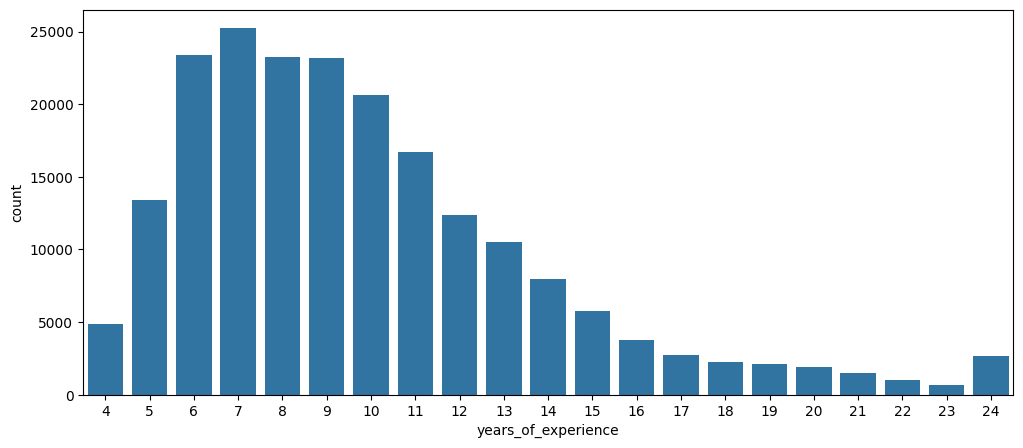

In [ ]:
plt.figure(figsize = (12,5))
sns.countplot(x="years_of_experience", data=df, order=sorted(df['years_of_experience'].unique()))
plt.show()

This data clearly tells us that learners with 6-10 years of experience are in high numbers at scaler which is also usual trend as learners with low_ctc_category are also high in number at scaler.

### Flag_tier

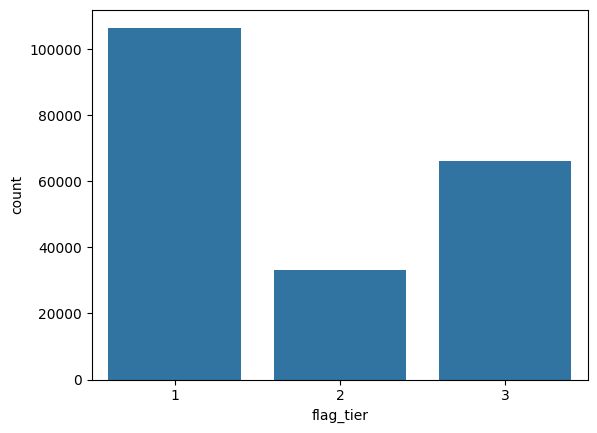

In [ ]:
sns.countplot(x="flag_tier", data=df, order=sorted(df['flag_tier'].unique()))
plt.show()

Mjority of learners are earning below their company's overall average salary . A smaller proportion are above average while around average is the smallest. This suggest high inequality at the company level, most employees are paid paid below company mean , while a smaller privilged group pulls the company average upward

### flag_class

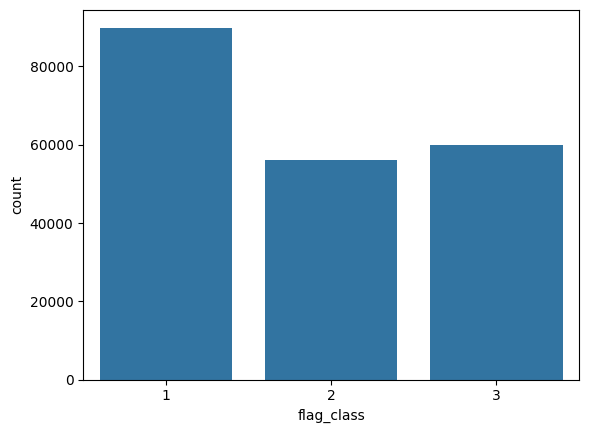

In [ ]:
sns.countplot(x="flag_class", data=df, order=sorted(df['flag_class'].unique()))
plt.show()

More ecployees fall into the below average category, but the distribution is more balanced compared to tier.
About equal numbers are around average and above average.
This indicates that job roles within companies show more balanced pay structures than the overall company view , though underpayment is still dominanat.

### flag_desingation

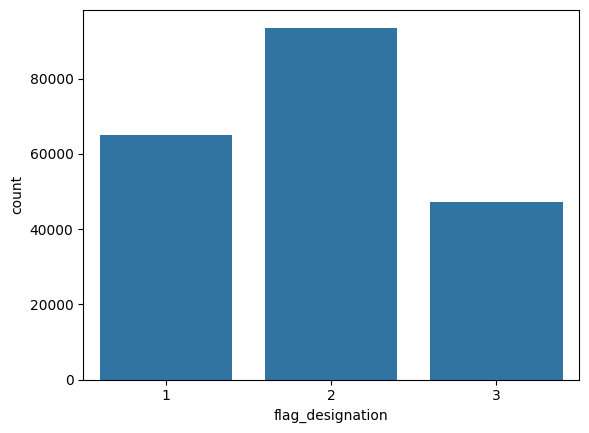

In [ ]:
sns.countplot(x="flag_designation", data=df, order=sorted(df['flag_designation'].unique()))
plt.show()

Here most empluees fall into the around average category , fewer are below or above average compared to their exact peer group. This shows that when experience is factored in, salaries are more aligned within groups.

# Bivariate Analysis

## top 10 most frequent job position vs average ctc

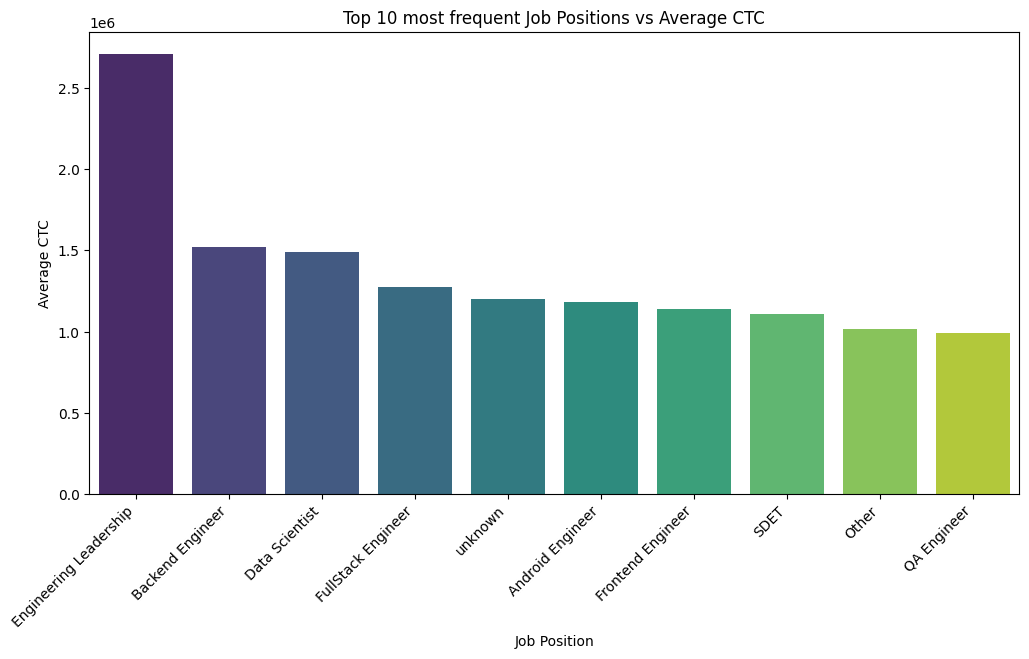

In [ ]:
top_positions = df['job_position'].value_counts().head(10).index
ctc_by_position = df[df['job_position'].isin(top_positions)].groupby('job_position')['ctc'].mean().sort_values(ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x=ctc_by_position.index, y=ctc_by_position.values, palette="viridis")
plt.xticks(rotation=45, ha='right')
plt.title("Top 10 most frequent Job Positions vs Average CTC")
plt.ylabel("Average CTC")
plt.xlabel("Job Position")
plt.show()

Among the most frequent job positions, Engineering Leadership roles command the highest average CTC (~27 lakhs), far ahead of other common positions. Technical roles such as Backend Engineer and Data Scientist also report strong salaries, while positions like QA Engineer, SDET, and Frontend Engineer appear on the lower end of the spectrum. The presence of Unknown and Other categories indicates incomplete or ambiguous job titles in the dataset.

## Entry level job position with high ctc

In [ ]:
entry_roles = df[df['job_position'].str.contains('Intern|Trainee|Fresher|Junior|Entry', case=False, na=False)]

In [ ]:
entry_ctc = (entry_roles.groupby('job_position')['ctc'].mean().sort_values(ascending=False)).head(10)

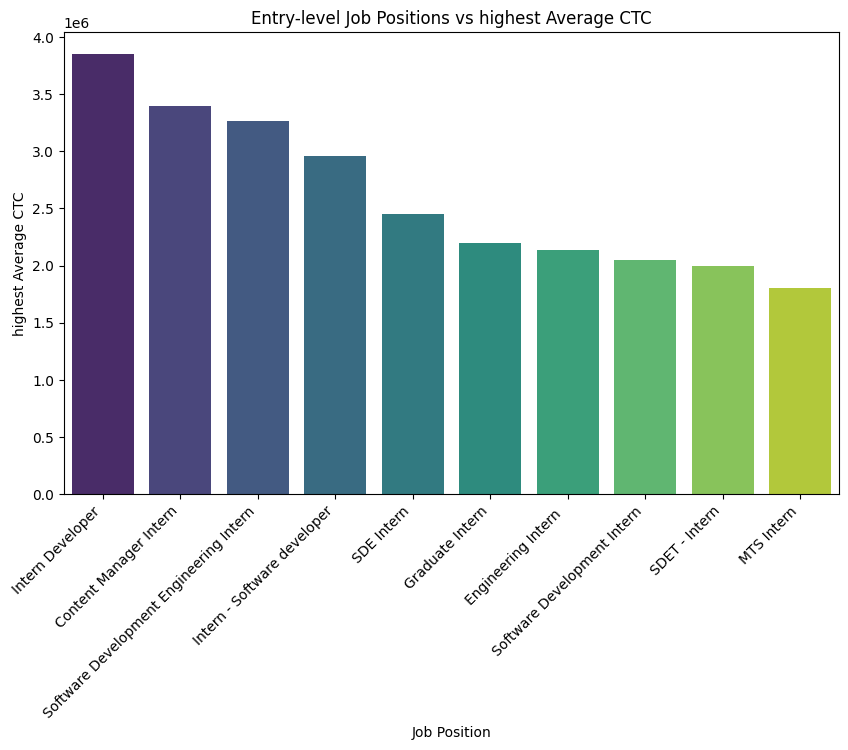

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x=entry_ctc.index, y=entry_ctc.values, palette="viridis")
plt.xticks(rotation=45, ha='right')
plt.title("Entry-level Job Positions vs highest Average CTC")
plt.ylabel("highest Average CTC")
plt.xlabel("Job Position")
plt.show()

Some entry-level roles such as Intern Developer and Content Manager Intern show unusually high average CTCs (30–38L), far above typical internship ranges. This indicates a few outliers driving up averages, especially in technical roles like SDE Intern and Software Developer Intern.

## Top 2 job position by average CTC in top 5 companies

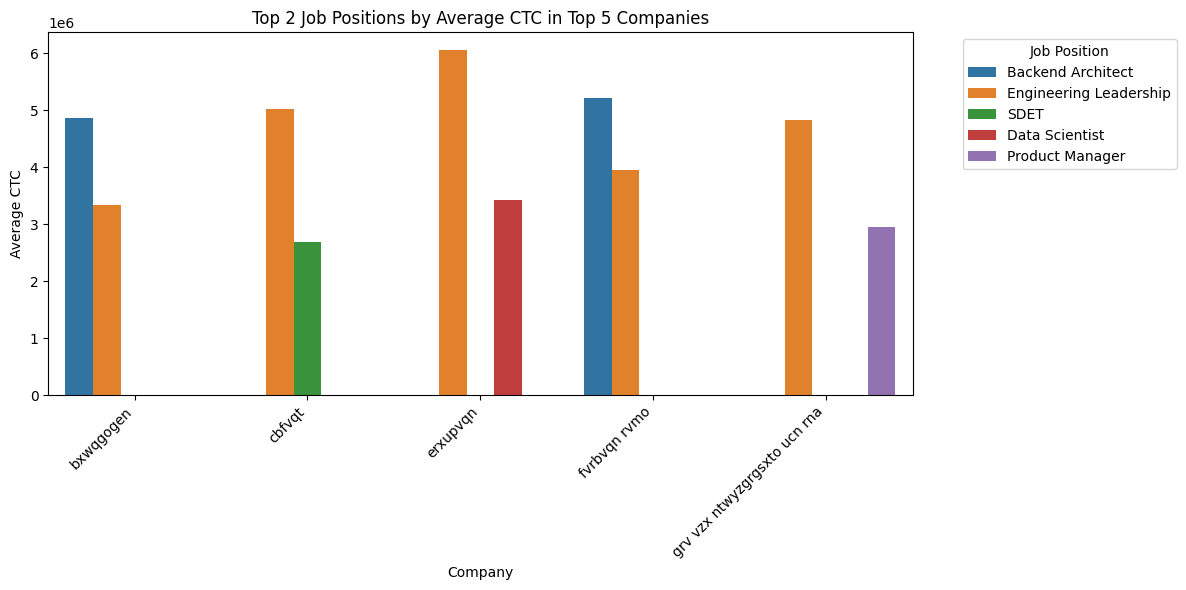

In [ ]:
MIN_SAMPLES = 10
TOP_N = 2
PLOT_COMPANIES = 5
stats = (df.groupby(['company_hash','job_position'])['ctc'].agg(mean_ctc='mean', median_ctc='median', count='count').reset_index())

stats = stats[stats['count'] >= MIN_SAMPLES]

stats['rank_in_company'] = stats.groupby('company_hash')['mean_ctc'].rank(method='first', ascending=False)
top_roles_per_company = stats[stats['rank_in_company'] <= TOP_N]

top_companies = (top_roles_per_company.groupby('company_hash')['mean_ctc'].max().nlargest(PLOT_COMPANIES).index)
plot_data = top_roles_per_company[top_roles_per_company['company_hash'].isin(top_companies)]

# 5) Plot
plt.figure(figsize=(12,6))
sns.barplot(data=plot_data, x='company_hash',y='mean_ctc',hue='job_position',dodge=True)
plt.title(f"Top {TOP_N} Job Positions by Average CTC in Top {PLOT_COMPANIES} Companies")
plt.ylabel("Average CTC")
plt.xlabel("Company")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Job Position", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Across the top 5 companies, Engineering Leadership consistently emerges as the highest-paying role, often exceeding 50–60 lakhs on average. Supporting roles like Backend Architect, Data Scientist, Product Manager, and SDET appear as the second-best positions depending on the company, but their average CTC is notably lower than leadership roles. This shows that while technical and managerial roles are well rewarded, leadership tracks clearly dominate compensation levels across firms.

## How does average ctc differ across experience level

In [ ]:
exp_based_ctc = df.copy()
exp_based_ctc['mean_ctc_yoe'] = df.groupby('years_of_experience')['ctc'].transform('mean')

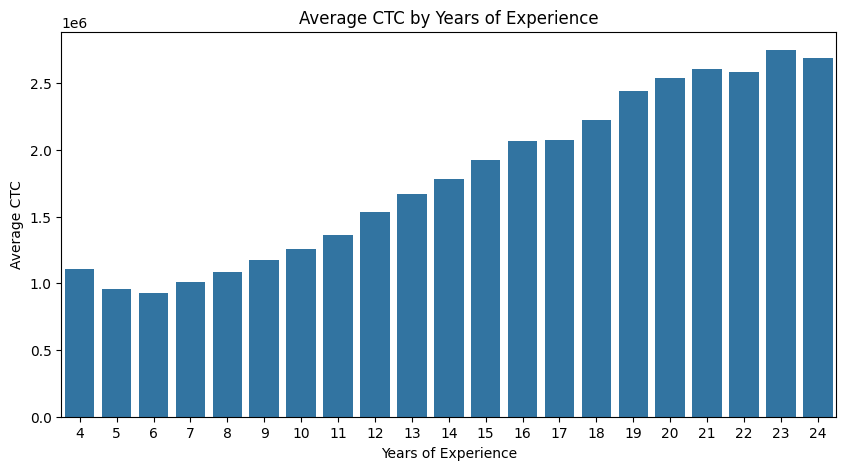

In [ ]:
plt.figure(figsize = (10,5))
sns.barplot(data=exp_based_ctc, x='years_of_experience', y='mean_ctc_yoe')
plt.title("Average CTC by Years of Experience")
plt.ylabel("Average CTC")
plt.xlabel("Years of Experience")
plt.show()

1. The visualization shows a clear positive relationship between years of experience and CTC.
2. Average CTC starts around 10 lakhs at ~4–5 years of experience and steadily increases, crossing 25–30 lakhs for employees with 20+ years of experience.
3. This highlights that experience is a strong driver of salary growth, with a particularly steep rise after ~12 years, reflecting mid-to-senior career progression.

## Which job position are more common in Tier3 companies vs Tier1 companies

In [ ]:
Tier3_companies = df[df['flag_tier'] == 3]
Tier1_companies = df[df['flag_tier'] == 1]

In [ ]:
JP_tier1 = Tier3_companies['job_position'].value_counts().reset_index().head(10)
JP_tier2 = Tier1_companies['job_position'].value_counts().reset_index().head(10)

In [ ]:
JP_tier1 = JP_tier1[JP_tier1['job_position'] != 'unknown']
JP_tier2 = JP_tier2[JP_tier2['job_position'] != 'unknown']

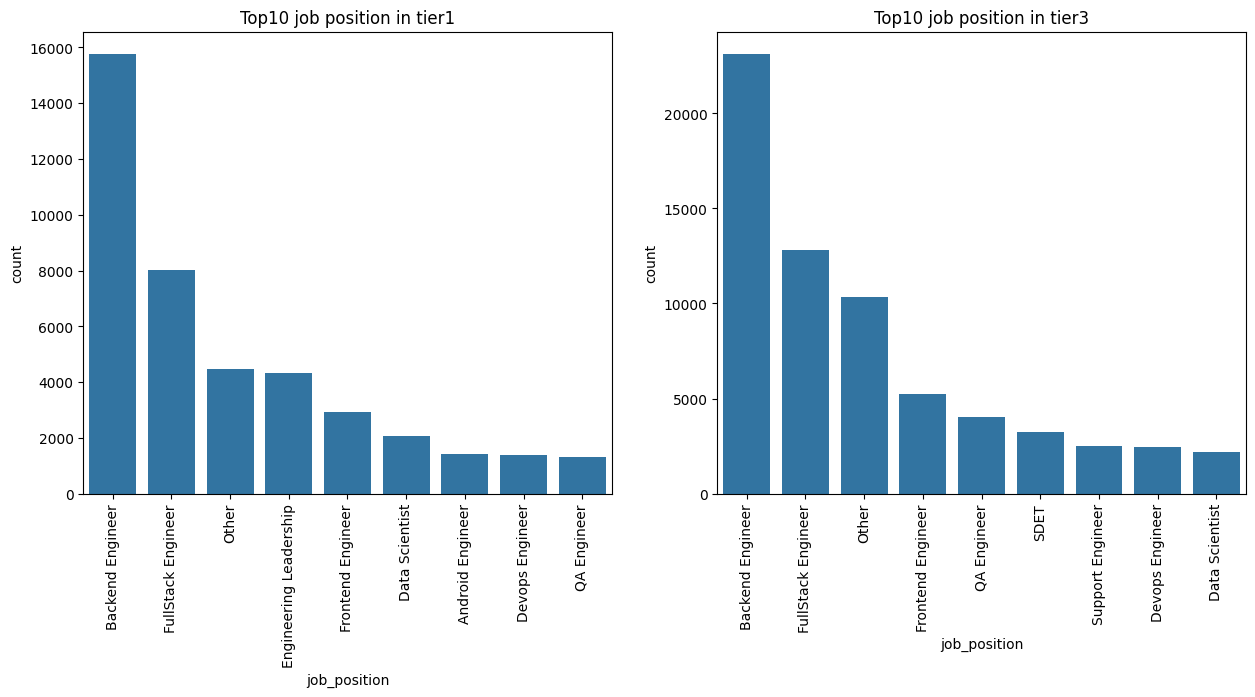

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
sns.barplot(y='count', x='job_position', data=JP_tier1)
plt.xticks(rotation = 90)
plt.title('Top10 job position in tier1')
plt.subplot(1,2,2)
sns.barplot(y='count', x='job_position', data=JP_tier2)
plt.xticks(rotation = 90)
plt.title('Top10 job position in tier3')
plt.show()

1. In Tier 1 (below-average CTC), roles like Backend Engineer and Fullstack Engineer dominate, but they represent positions where employees earn relatively lower salaries despite being in high demand.
2. In Tier 3 (above-average CTC), we again see Backend Engineer and Fullstack Engineer as common, but at much higher pay levels. Roles like Frontend Engineer, QA Engineer, and SDET also show stronger presence compared to Tier 1.
3. This shows that the same job position at the same company can fall into different tiers depending on the employee’s CTC — which is often influenced by years of experience or seniority.
4. In short, tiers don’t just separate job titles, but highlight how experience and compensation variation within the same role and company can push employees into different tiers.

## Origin Year vs CTC category

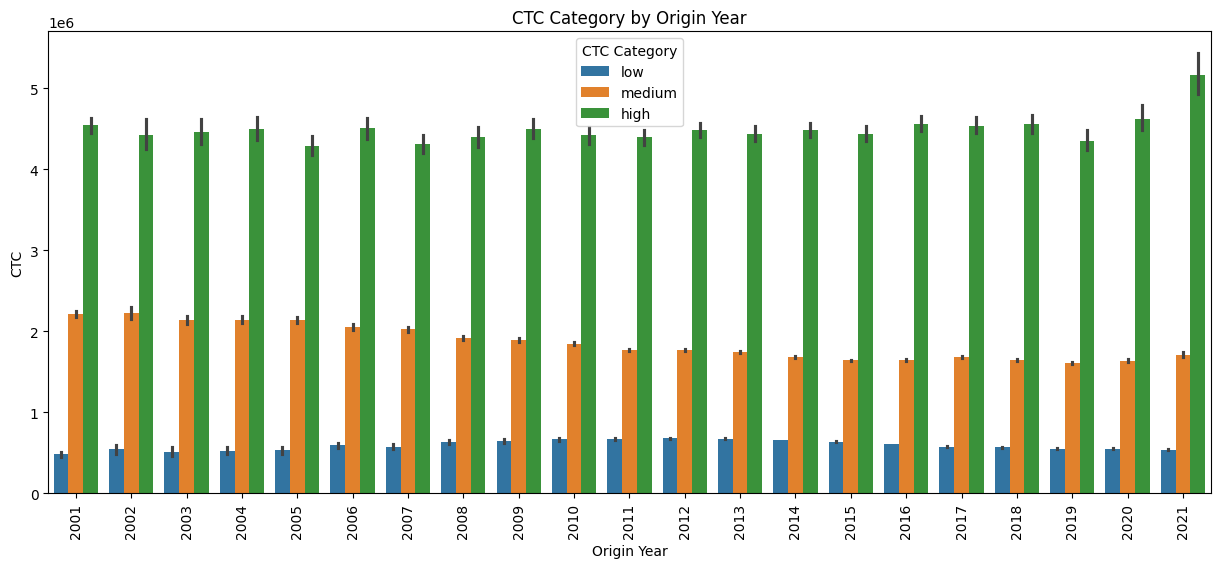

In [ ]:
plt.figure(figsize = (15,6))
sns.barplot(data=df, x='orgyear', y='ctc', hue='ctc_category')
plt.xticks(rotation = 90)
plt.title("CTC Category by Origin Year")
plt.xlabel("Origin Year")
plt.ylabel("CTC")
plt.legend(title="CTC Category")
plt.show()

1. Across all origin years, the high CTC category consistently shows the largest salary values, while the low CTC group naturally appears much smaller because their absolute earnings are lower, not necessarily their population.
2. The medium CTC group has been declining slightly in recent years, while the high CTC group shows a slight upward trend, especially after 2020.
3. This suggests that over time, salary growth has been more favorable at the high end, while medium earners have stagnated a bit.
4. It is important to note that the small size of the low CTC bars reflects low salary values, not necessarily a smaller number of employees in that category.

## Job Position vs Flag class


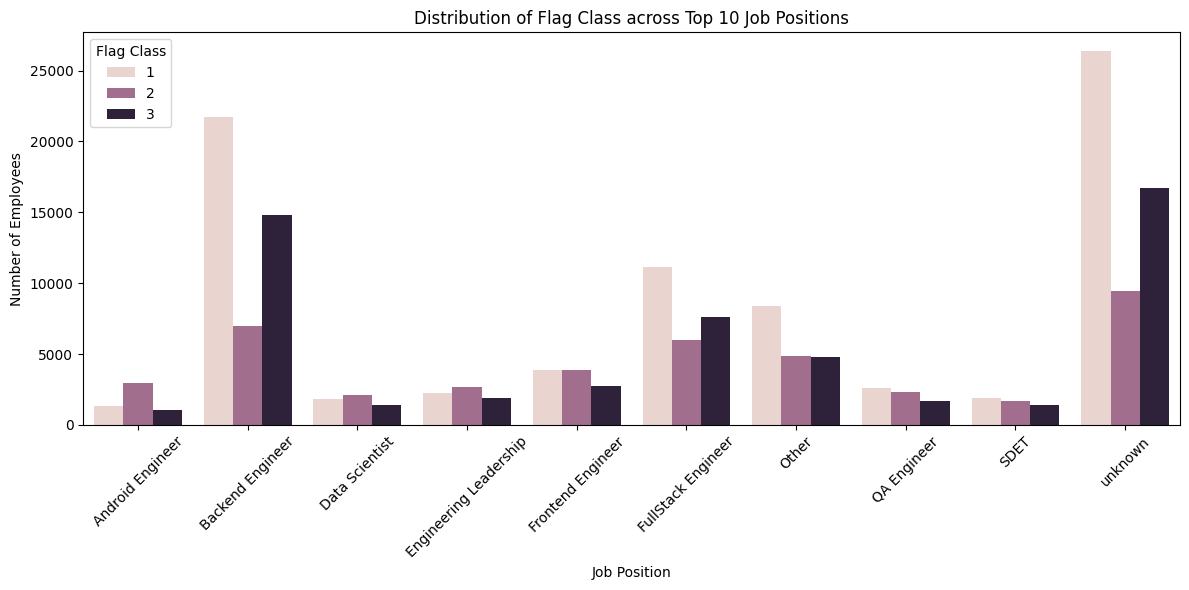

In [ ]:
# Count how many employees fall in each flag_class per job_position
job_flag_dist = df.groupby(['job_position', 'flag_class']).size().reset_index(name='count')

# Keep only top N job positions (otherwise too many bars)
top_jobs = df['job_position'].value_counts().head(10).index
job_flag_dist = job_flag_dist[job_flag_dist['job_position'].isin(top_jobs)]

# Plot
plt.figure(figsize=(12,6))
sns.barplot(data=job_flag_dist, x='job_position', y='count', hue='flag_class')
plt.title("Distribution of Flag Class across Top 10 Job Positions")
plt.xlabel("Job Position")
plt.ylabel("Number of Employees")
plt.xticks(rotation=45)
plt.legend(title="Flag Class")
plt.tight_layout()
plt.show()

The distribution shows that Backend Engineers and Fullstack Engineers dominate across all flag classes, especially in Class 1 (below-average earners) and Class 3 (above-average earners), highlighting wide pay variation within these roles. Data Scientists and Engineering Leadership roles are relatively balanced across classes, suggesting more consistent pay bands. Interestingly, a significant portion of employees fall under “Unknown” job positions, which span all classes and may indicate data quality issues that should be addressed.

## average ctc across different job postition

In [ ]:
avg_ctc_by_job = df.groupby('job_position')['ctc'].mean().reset_index()
avg_ctc_by_job.columns = ['job_position', 'average_ctc']
avg_ctc_by_job = avg_ctc_by_job.sort_values(by='average_ctc', ascending=False)
print(avg_ctc_by_job.head(10))

                            job_position  average_ctc
228                Electric power supply  10000000.00
447                         PhD. Student   8400000.00
811                      Sr HR Executive   8360000.00
78   Associate Director, Online Products   7000000.00
625      Senior Manager, Online Products   7000000.00
731     Software Development Engineer IV   6200000.00
730    Software Development Engineer III   6200000.00
734     Software Development Engineer ||   6200000.00
928                       Vice President   6100000.00
240                Engineering Lead - AI   6000000.00


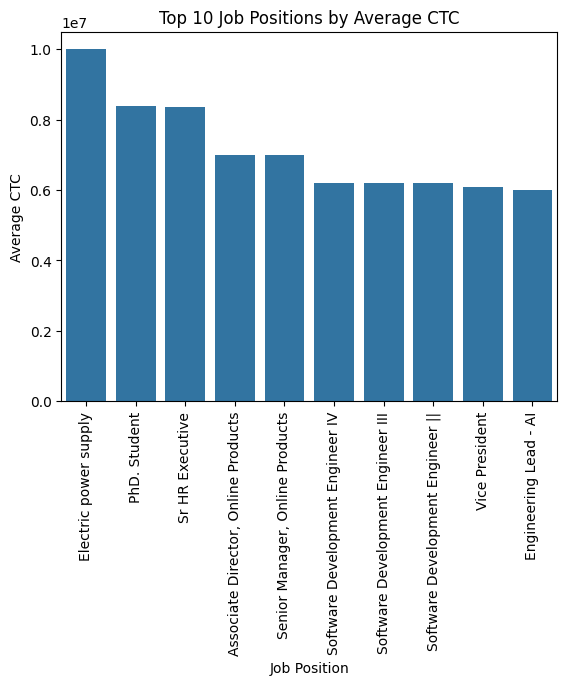

In [ ]:
sns.barplot(x='job_position', y='average_ctc', data=avg_ctc_by_job.head(10))
plt.xticks(rotation=90)
plt.title('Top 10 Job Positions by Average CTC')
plt.xlabel('Job Position')
plt.ylabel('Average CTC')
plt.show()

The chart shows the top job positions with the highest average CTC. “Electric Power Supply” surprisingly stands out with the highest package (1 crore), followed by “PhD Student” and “Sr HR Executive” with 80 to 85 lakhs. Senior leadership and specialized roles such as “Associate Director,” “Vice President,” and “Engineering Lead - AI” also appear in the top list, reflecting the premium value placed on strategic and technical expertise. Additionally, advanced software development roles (Engineer II–IV) consistently command strong salaries, showing that both leadership and specialized technical tracks can lead to high compensation.

# Preparing the Clustering Dataset

In [ ]:
df_cluster['recency'] = df_cluster['ctc_updated_year'] - df_cluster['orgyear']

In [ ]:
df_cluster1 = df_cluster.copy()

In [ ]:
df_cluster1.drop(['orgyear','ctc_updated_year','company_hash','email_hash'] ,axis=1,inplace=True)

## Encoding and Scaling/normalizing the newly created ataset

### Target encoding 'job_position'

In [ ]:
job_position_mapping = df_cluster1.groupby('job_position')['ctc'].mean()
df_cluster1['job_position'] = df_cluster1['job_position'].map(job_position_mapping)

### Standarize ctc , years_of_experience , recency

### Standarizing ctc


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
cols = ['ctc','recency','years_of_experience']

In [ ]:
df_cluster1[cols] = scaler.fit_transform(df_cluster1[cols])

In [ ]:
df_cluster1.head()

,ctc,job_position,years_of_experience,recency
0,0.16,13.50,-0.21,-0.12
1,-0.97,13.77,-0.70,-0.87
2,0.91,13.96,0.04,0.13
3,-0.41,13.96,-0.46,-0.62
4,0.46,13.77,-0.46,-0.62


In [ ]:
# check the clustering tendency of df_cluster1 using hopkins statistics
!pip install pyclustertend

In [ ]:
from pyclustertend import hopkins

In [ ]:
X = df_cluster1[['ctc', 'recency', 'years_of_experience']].values

In [ ]:
score = hopkins(X, X.shape[0])
print(f"Hopkins Statistic: {score:.4f}")

Hopkins Statistic: 0.0013


## Lets visualize this using PCA

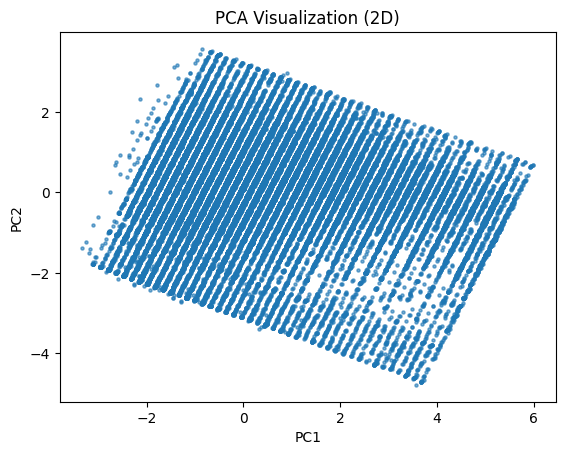

Explained variance ratio: [0.70571118 0.26032171]
Total variance explained: 0.9660328864754915


In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
# Select features
X = df_cluster1[['ctc','years_of_experience','recency','job_position']]
# Run PCA (2 components for visualization)
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

# Plot
plt.scatter(X_pca[:,0], X_pca[:,1], s=5, alpha=0.6)
plt.title("PCA Visualization (2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# Explained variance ratio (to see how much info is kept)
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Total variance explained:", pca.explained_variance_ratio_.sum())

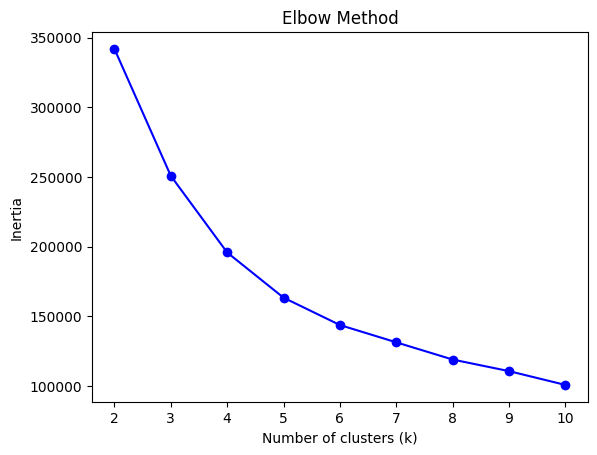

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
inertia = []
K = range(2, 11)  # test cluster numbers from 2 to 10
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_cluster1)
    inertia.append(kmeans.inertia_)
plt.plot(K, inertia, 'bo-')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

Looking at the above visualiztion cluster = 5 seems to be ideal as after that the curve starts to flatten

## Silhoutte score check

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
k = 5
km = KMeans(n_clusters=k, random_state=42, n_init='auto')
labels = km.fit_predict(df_cluster1)
score = silhouette_score(df_cluster1, labels,sample_size=10_000, random_state=42, metric='euclidean')
print("Silhouette (sampled):", score)

Silhouette (sampled): 0.3122951181266192


I am going to use a sample dataset because time complexity of silhoutte score is O(n^2), and for more than 2 lakh rows it is going to take too much time that is why i am running it on sample dataset. Moreover we got silhoutte score of .31 on 5 clusters which indicates moderate clustering quality which is acceptable for large , real world organiztional dataset. This also means that dataset shows meaningful seperation but not perfect.

## KMeans for unsupervised algorithm

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)
df_cluster1['cluster'] = kmeans.fit_predict(df_cluster1)

In [ ]:
Kmeans_cluster = df_cluster.copy()

In [ ]:
Kmeans_cluster['cluster'] = df_cluster1['cluster'].values

In [ ]:
Kmeans_cluster

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,recency,cluster
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c050c0618caea697c87af,2016,13.91,Other,2020.00,9,4.00,4
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c100a9661a92bdcc0407b,2018,13.02,FullStack Engineer,2019.00,7,1.00,3
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e90fd66c9df6b37b9059,2015,14.51,Backend Engineer,2020.00,10,5.00,2
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58a44274d5d6876dfec7,2017,13.46,Backend Engineer,2019.00,8,2.00,3
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520214b31b95211adb095,2017,14.15,FullStack Engineer,2019.00,8,2.00,0
...,...,...,...,...,...,...,...,...,...
205838,vuurt xzw,70027b728c8ee901fe979533ed94ffda97be08fc23f33b6e8d7cb06af04e0c05,2008,12.30,unknown,2019.00,17,11.00,4
205839,husqvawgb,7f7292ffad724ebbe9ca860f515245368d714c84705b4264c8e881b4a61cdb53,2017,13.12,unknown,2020.00,8,3.00,3
205840,vwwgrxnt,cb25cc7304e9a24facda7f5567c7922ffc48e3d5d6018c8852b58da2fde5e00c,2021,13.46,unknown,2021.00,4,0.00,3
205841,zgn vuurxwvmrt,fb46a1a2752f5f652ce634f6178d0578ef6995ee59f6c819ec41f6af222a8699,2019,15.44,unknown,2019.00,6,0.00,0


## UMAP - Visualization

In [ ]:
!pip install umap-learn

In [ ]:
import umap.umap_ as umap

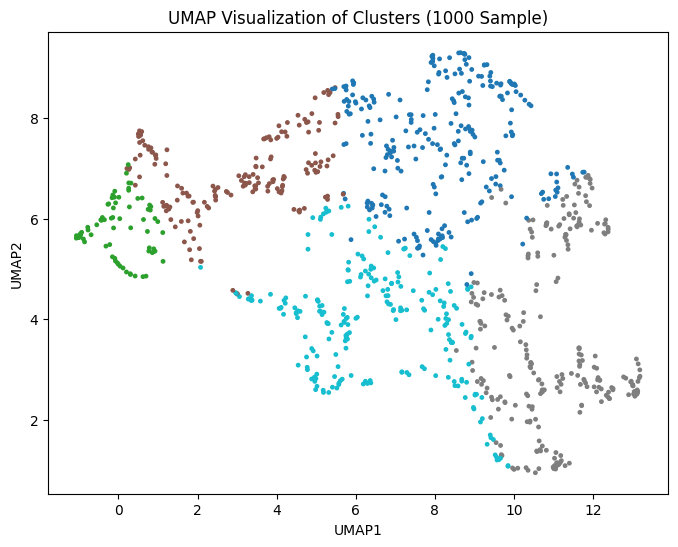

In [ ]:
sample = df_cluster1.sample(n=1000, random_state=42)
x_sample = sample[['ctc', 'years_of_experience', 'recency', 'job_position']]

import umap.umap_ as umap
emb = umap.UMAP(n_components=2
                , random_state=42).fit_transform(x_sample)
# Plot with cluster colors
plt.figure(figsize=(8,6))
plt.scatter(emb[:,0], emb[:,1], c=sample['cluster'], s=6, cmap='tab10')
plt.title("UMAP Visualization of Clusters (1000 Sample)")
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
plt.show()

The UMAP visualization of 1000 sampled learners shows that the dataset has a clear clustering tendency with five main groups emerging.Each cluster represents one cluster from k means and the cluster form compact regions with some  overlap. This confirms that the clustering is meaningful, though not perfectly distinct and can be used to profile differences in ctc , year_of_experience , job_positions across groups.

## Determining properties of Cluster

In [ ]:
Kmeans_cluster

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,recency,cluster
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c050c0618caea697c87af,2016,13.91,Other,2020.00,9,4.00,4
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c100a9661a92bdcc0407b,2018,13.02,FullStack Engineer,2019.00,7,1.00,3
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e90fd66c9df6b37b9059,2015,14.51,Backend Engineer,2020.00,10,5.00,2
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58a44274d5d6876dfec7,2017,13.46,Backend Engineer,2019.00,8,2.00,3
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520214b31b95211adb095,2017,14.15,FullStack Engineer,2019.00,8,2.00,0
...,...,...,...,...,...,...,...,...,...
205838,vuurt xzw,70027b728c8ee901fe979533ed94ffda97be08fc23f33b6e8d7cb06af04e0c05,2008,12.30,unknown,2019.00,17,11.00,4
205839,husqvawgb,7f7292ffad724ebbe9ca860f515245368d714c84705b4264c8e881b4a61cdb53,2017,13.12,unknown,2020.00,8,3.00,3
205840,vwwgrxnt,cb25cc7304e9a24facda7f5567c7922ffc48e3d5d6018c8852b58da2fde5e00c,2021,13.46,unknown,2021.00,4,0.00,3
205841,zgn vuurxwvmrt,fb46a1a2752f5f652ce634f6178d0578ef6995ee59f6c819ec41f6af222a8699,2019,15.44,unknown,2019.00,6,0.00,0


### Average_ctc in each cluster

In [ ]:
Kmeans_cluster['ctc'] = np.exp(Kmeans_cluster['ctc'])

In [ ]:
Kmeans_cluster.groupby('cluster')['ctc'].mean()

,ctc
cluster,
0,1789655.54
1,2452942.72
2,2200861.14
3,483758.82
4,723200.82


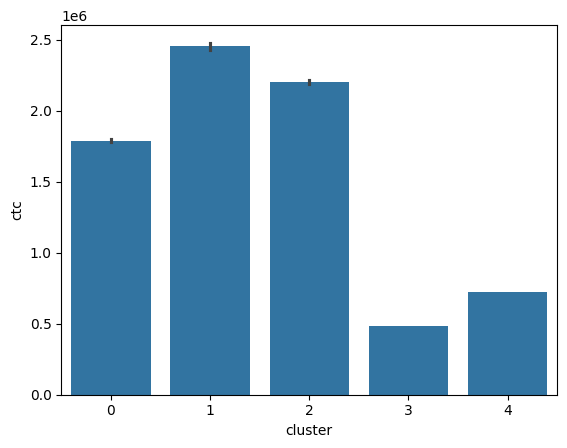

In [ ]:
sns.barplot(x='cluster',y='ctc',data=Kmeans_cluster)
plt.show()

1. CLuster0 = solid mid level earners
2. Cluster1 = High earner possibly senior engineer or in demand roles
3. Cluster2 = upper mid level professionals
4. Cluster3 = clearly entry level or early career employees
5. Cluster4 = Slightly better than cluster3 may be junior/associate roles

### No. of users in each clusters

In [ ]:
Kmeans_cluster['cluster'].value_counts(normalize = True)

,proportion
cluster,
3,0.28
0,0.25
4,0.22
2,0.19
1,0.07


We can clearly see that maximum number of users lie in cluster3 then cluster0 then cluster4 then cluster2 and finally cluster1 with least number of users

1.	Most learners are concentrated in Cluster 3 (28%), which represents entry-level or early career employees with the lowest CTCs.
2.	Cluster 0 (25%) has a solid share of learners, representing mid-level earners with stable salaries.
3.	Cluster 4 (22%) is slightly better than entry-level (junior/associate roles), while Cluster 2 (19%) and Cluster 1 (7%) represent the smaller share of high-paying roles.
4. although Clusters 1 & 2 have the highest average CTC, they have the least number of users, showing that high-paying roles are much rarer.
5.	This pattern highlights a pyramid structure: majority are entry/mid-level, while only a small minority reach the top-paying positions.

### Average years of experience in each cluster

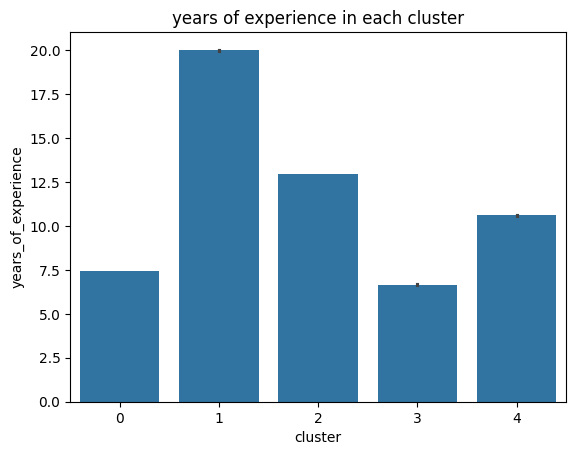

In [ ]:
sns.barplot(data = Kmeans_cluster , x = 'cluster' , y = 'years_of_experience')
plt.title('years of experience in each cluster')
plt.show()

This visualization clearly suggest that cluster1 is highly experienced users and that explains their high ctc

while cluster3 is an entry level role and that is why experience is less for them but their experience is almost simialr to the mid level roles still they earn less than mid level professionals.

cluster0 shows a unique behaviour where users in this cluster are earning great stable salary and they are also sharing 2nd most share in all clusters which clearly shows that these mid level learners wants to actively upskill  themselves to reach higher position as they have advantage of both high ctc and sufficient years of experience but strange point to notice that year of experince is almost similar to that of entry level professionals but earn higher than entry level professionals might be because of the profession they have choosen.  

cluster4 is getting better ctc as compared to cluster3 because of more number of experience than cluster3 and cluster2 is similar to cluster1 with slightly less number of experience than cluster1 which also explains a slight difference in their ctc

### most common job_position in each clusters

In [ ]:
top_jobs = Kmeans_cluster.groupby('cluster')['job_position'].agg(lambda x: x.value_counts().idxmax())
top_jobs

,job_position
cluster,
0,Backend Engineer
1,Engineering Leadership
2,Backend Engineer
3,unknown
4,unknown


1.	Clusters 0 and 2 are dominated by Backend Engineers, suggesting these clusters largely represent technical developer roles.
2.	Cluster 1 is led by Engineering Leadership, meaning this group likely captures senior or managerial roles with higher responsibility.
3.	Clusters 3 and 4 are dominated by Unknown job positions, which shows a limitation in data quality — many learners either did not disclose or had their job positions anonymized. These clusters may not give much role-specific insight but can still be analyzed based on CTC, experience, and recency.

technical engineering roles (Backend Engineers) and leadership roles (Engineering Leadership) form distinct clusters, while data gaps in job titles (Unknowns) dominate other groups.

## Hierarchical Clustering for unsupervised machine learning

In [ ]:
df_hierarchical = df_cluster1.drop(columns=['cluster'] , axis = 1)

In [ ]:
sample_data = df_hierarchical.sample(n=1000, random_state=42)

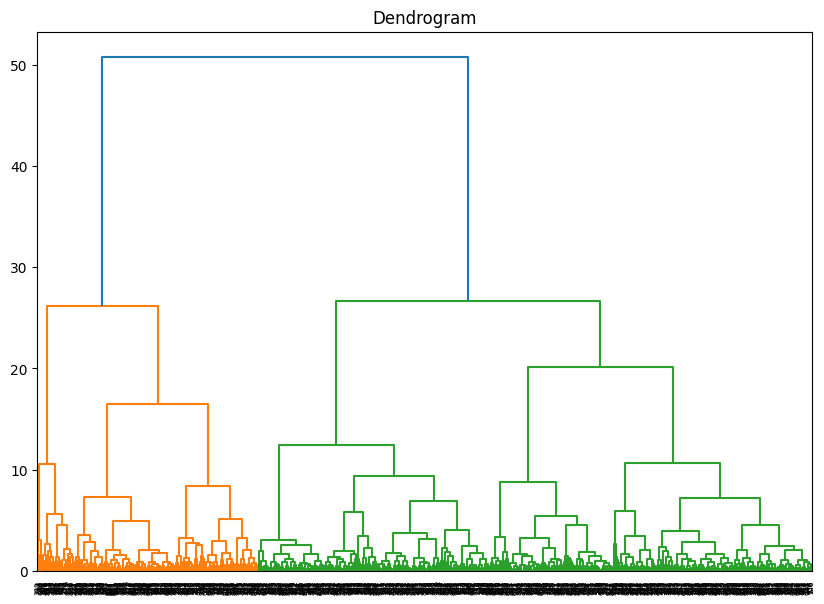

In [ ]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
dend = shc.dendrogram(shc.linkage(sample_data, method='ward'))

From this dendogram we can clearly see that distance between 25 and 30 major merges occur this indicates that optimal number of clusters should be 4  as cutting the dendogram at this level gives us 4 distinct groups before large merges happen.

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
# Apply Agglomerative Clustering with 4 clusters (based on dendrogram)
agg_clustering = AgglomerativeClustering(n_clusters=4 , metric = 'euclidean' , linkage = 'ward')
agg_labels = agg_clustering.fit_predict(sample_data)

# Add the cluster labels to the original dataframe
sample_data['hierarchical_cluster'] = agg_labels

# Display the number of data points in each cluster
display(sample_data['hierarchical_cluster'].value_counts())

,count
hierarchical_cluster,
0,415
2,300
1,238
3,47


In [ ]:
df_cluster_sampled = df_cluster.loc[sample_data.index].copy()

df_cluster_sampled['hierarchical_cluster'] = sample_data['hierarchical_cluster'].values

## UMAP visualization

In [ ]:
sample_data

,ctc,job_position,years_of_experience,recency,hierarchical_cluster
14196,-0.33,13.84,-0.46,-0.37,0
143574,0.04,13.75,-0.21,-0.12,2
91306,-0.61,13.50,-0.21,-1.38,2
93003,-0.61,13.70,-0.21,-0.12,0
29094,0.55,13.69,0.28,0.63,1
...,...,...,...,...,...
151295,0.16,13.96,-0.70,-0.62,2
90341,-2.06,13.69,2.01,2.14,0
70878,1.54,13.96,1.27,0.88,1
150641,-1.12,13.56,-0.70,-0.87,0


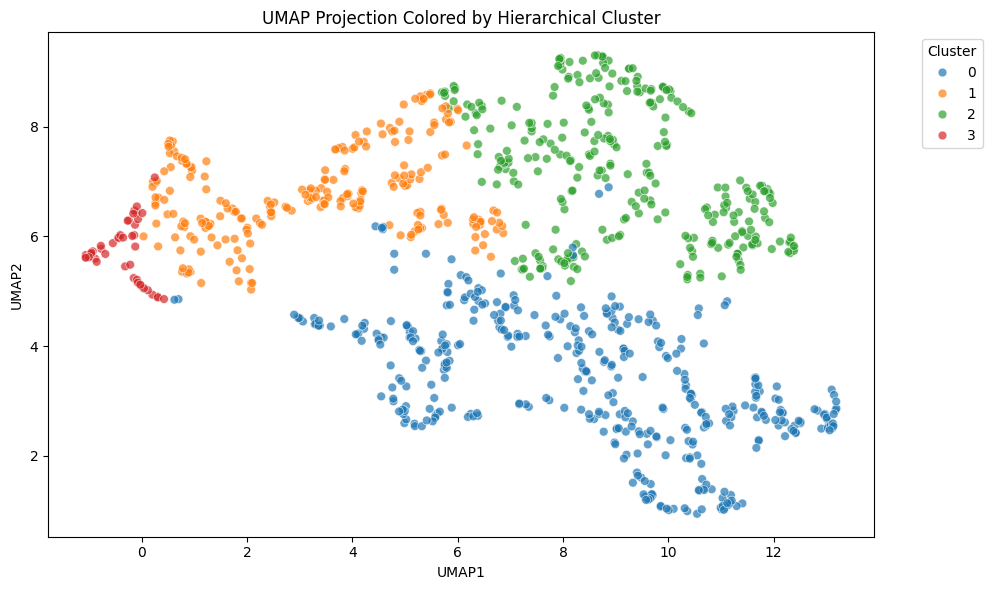

In [ ]:
features = ['ctc', 'years_of_experience', 'recency', 'job_position']
X = sample_data[features]

reducer = umap.UMAP(n_components=2, random_state=42)
embedding = reducer.fit_transform(X)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1],hue=sample_data['hierarchical_cluster'],
                palette='tab10', s=40, alpha=0.7)
plt.title('UMAP Projection Colored by Hierarchical Cluster')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


From the 1000-sample UMAP visualization, we can see four clear clusters: a large spread-out group (blue), two medium-sized groups (orange and green) that are more compact, and one small concentrated group (red). This shows that our learners naturally fall into four distinct patterns, with some groups being broad and mixed while others are tightly grouped and more uniform.”

## Determining Properties of each cluster

### Average_ctc in each cluster

In [ ]:
df_cluster_sampled['ctc'] = np.exp(df_cluster_sampled['ctc'])

In [ ]:
df_cluster_sampled.groupby('hierarchical_cluster')['ctc'].mean()

,ctc
hierarchical_cluster,
0,580369.64
1,2192722.85
2,1539510.33
3,2970958.43


In [ ]:
avg_ctc = df_cluster_sampled.groupby('hierarchical_cluster')['ctc'].mean()

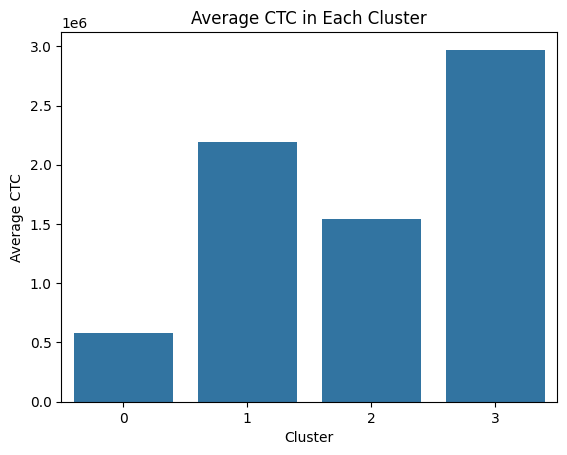

In [ ]:
sns.barplot(x=avg_ctc.index, y=avg_ctc.values)
plt.title('Average CTC in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average CTC')
plt.show()

1. cluster0 = clearly entry level or early career employees
2. cluster1 = upper mid level learners
3. cluster2 = Mid-level professionals
4. cluster3 = high earners probably senior engineers or in demand roles

### No. of user in each cluster

In [ ]:
df_cluster_sampled['hierarchical_cluster'].value_counts(normalize = True)

,proportion
hierarchical_cluster,
0,0.41
2,0.30
1,0.24
3,0.05


In [ ]:
user_in_cluster =  df_cluster_sampled['hierarchical_cluster'].value_counts(normalize = True)

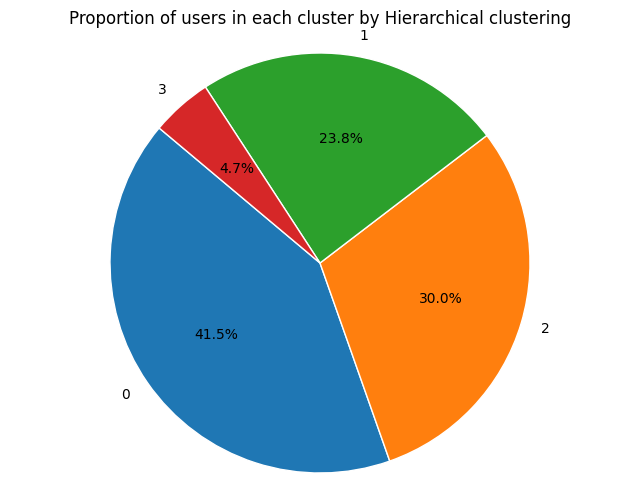

In [ ]:
plt.figure(figsize=(8, 6))
plt.pie(user_in_cluster, labels=user_in_cluster.index, autopct='%1.1f%%', startangle=140,
        colors=plt.cm.tab10.colors, wedgeprops={'edgecolor': 'white'})
plt.title('Proportion of users in each cluster by Hierarchical clustering')
plt.axis('equal')  # Equal aspect ratio ensures the pie is circular
plt.show()

1.	Most learners are concentrated in Cluster 0 (41.5%), which represents entry-level or early career employees with the lowest CTCs.
2.	Cluster2 is among the second highest proportion(30.0%) and they are the Mid level professionals
3. Cluster3 is high earner learners and they are less in proportion of about (4.7%)
4. Cluster1 which upper mid level learner are 3rd highest in proportion of about(23.8%)

This profiling of clusters using hierarchical clustgering is very much similar to the Kmeans Clustering

### Average years of experience in each cluster

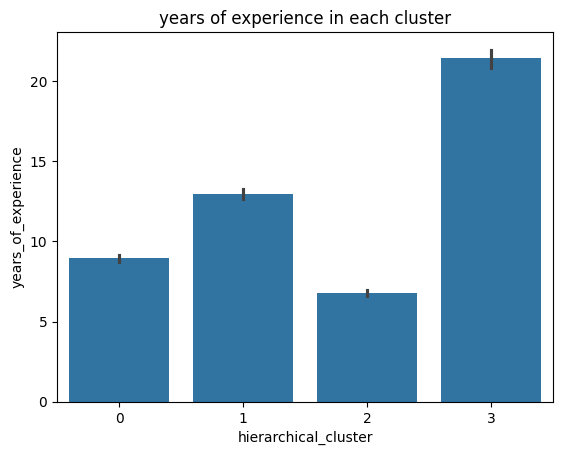

In [ ]:
sns.barplot(data = df_cluster_sampled, x = 'hierarchical_cluster' , y = 'years_of_experience')
plt.title('years of experience in each cluster')
plt.show()

This plot shows us that
1. Cluster3 - High earner employees are having higher year of experience which also explains why their ctc is high and they are also less in number
2. Cluster1 - upper mid level employees who are having secong highest year of experience which are having third highest proportion of users
3. Cluster2 = mid-level professionals also have a sufficient year of experience although their year of experience is less than entry level learners but still earns more than them , it might be because of the profession they have choosen
4. Cluster0 =  They are entry level learners but they despite having year of experience greater than mid level learners still theay are earning less than mid level professionals, job profession plays a vital role in this case.

### most common job position in each cluster

In [ ]:
top_jobs = df_cluster_sampled.groupby('hierarchical_cluster')['job_position'].agg(lambda x: x.value_counts().idxmax())
top_jobs

,job_position
hierarchical_cluster,
0,unknown
1,Backend Engineer
2,unknown
3,Engineering Leadership


if we look at the most common job_position in each cluster it is very mush similar to kmeans clustering with High earners being in engineering leadership position and upper mid level professionals in backend engineer profession.

Since we ran CLuster profiling on both Kmeans and Hierarchical clustering which we saw it eventually that they were giving same cluster pattern on broader terms hence any on them can be choosen for final cluster profiling but since Kmeans cluster profiling is based on entire dataset whereas hierarchical clustering is based on a sample of dataset therefore Kmeans is more suitable for Cluster profiling than Hierarchical clustering

# Final cluster profiling based on kmeans

1. **CLuster 0** : ***Solid Mid level Group***(large share , moderate CTC , mid level experience)
2. **Cluster 1** : ***High Value Niche*** (small proportion , senior level experience , high CTC)
3. **Cluster 2** : ***Established Professional***(medium size proportion , mid-to-high CTC, experienced)
4. **Cluster 3** : ***Entry Level Bulk***(Biggest cluster by size , low CTC and early experience)
5. **Cluster 4** : ***Growing Associates***(medium large in proportion , lower CTC , early-mid carrer)


# Questionnaire

### 1. What percentage of users fall into the largest cluster?
Ans : 28 percent of user from Entry level Bulk cluster

### 2. Comment on the characteristics that differentiate the primary clusters from each other.
Ans :
1. CLuster 0 : Solid Mid level Group(large share , moderate CTC , mid level experience)
2. Cluster 1 : High Value Niche (small proportion , senior level experience , high CTC)
3. Cluster 2 : Established Professional(medium size proportion , mid-to-high CTC, experienced)
4. Cluster 3 : Entry Level Bulk(Biggest cluster by size , low CTC and early experience)
5. Cluster 4 : Growing Associates(medium large in proportion , lower CTC , early-mid carrer)
### 3. Is it always true that with an increase in years of experience, the CTC increases? Provide a case where this isn't true.
Ans : Yes on average CTC increases with years of experience , However clustering reveals an exception where employees with higher experience earn less than peers with lower experience often due to job role differences. for example in hierarchical clustering early-career cluster showed more average experience than a mid level cluster yet had a significantly lower ctc
### 4. Name a job position that is commonly considered entry-level but has a few learners with unusually high CTCs in the dataset.
Ans : intern developer , content manager intern shown unusual high average ctc
### 5. What is the average CTC of learners across different job positions?
Ans : After capping extreme outliers between ₹1 lakh and ₹1 crore for reliability, we found that top-paying roles like Electric Power Supply and PhD Students average closer to ₹1 Cr, while senior engineering and leadership roles average around 60 to 80 lakh. This demonstrates that even after correcting for outliers, job position strongly influences compensation
### 6. For a given company, how does the average CTC of a Data Scientist compare with other roles?
Ans:


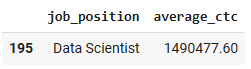


### 7. Discuss the distribution of learners based on the Tier flag:
**a. Which companies dominate in Tier 1 and why might this be the case?**


###   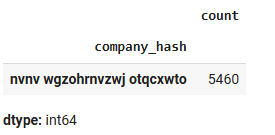

The reason may be that they hire in bulk at entry/junior levels ro belong to industries with lower pay scales compared to tier2 and tier3 companies

   
**b. Are there any notable patterns or insights when comparing learners from Tier 3 across different companies?**

Ans: The distribution of Tier-3 learners across companies is heavily right-skewed. Most companies have very few Tier-3 learners  while a small number of companies host disproportionately large groups of Tier-3 learners

###8. After performing unsupervised clustering:
**a. How many clusters have been identified using the Elbow method?**

Ans: 5 clusters seems suitable after examining elbow nethod

**b. Do the clusters formed align or differ significantly from the manual clustering efforts? If so, in what way?**
Ans: The algorithmic clusters support the manual clustering logic but add more granularity and complexity. They align on the overall structure but differ in how finely they separate groups.

### 9. From the Hierarchical Clustering results:
**a. Are there any clear hierarchies or patterns formed that could suggest the different levels of seniority or roles within a company?**
Ans : yes mostly hierarchies were seperated from each other with some few overlappings of very few data points but overall we can easily segregate different cluster based on seniority level

**b. How does the dendrogram representation correlate with the 'Years of Experience' feature**

Ans : The dendrogram representation aligns well with the Years of Experience feature. Clusters clearly separate employees by seniority levels - from entry-level (approx 7 years) to mid-level (approx 9 - 13 years), and finally to highly experienced professionals (approx 21 years). This indicates that hierarchical clustering is effectively grouping learners based on their experience progression.


# Recommendation

1. Focus on Backend and Fullstack Engineers, these roles dominate across companies and tiers . Scaler should continue strengthning courses hereas they attract maximum learners
2. Roles like Engineering Leadership and senior manager consistently rank high in CTC . Scaler can introduce dedicated leadership and management tech tracks
3. As we have seen that there are few jobs that earn higher than other jobs despite having less no. of experience hence scaler should also focus more on such types of field so that they can upskill learners in much positive way.
4. Scaler should also focus on Future driven Field like AI , data Science , machine learning  so that we can prepare our indian workforce for future, Although these courses are part of scaler but still less in number this can be due to lack of awarness for newly created field.
5. learners from tier3 companies form the largest share but have wealer CTC.  Scaler can position specialized "career accelerator programs for tier3 learners
6. Some entry level roles (like Backend Engineer , Data Scientist) show strong salaries . Scaler can guide fresher to these tracks for quicker ROI
7. Market top-paying roles  as 'career goals' and show how scaler courses map to them.
8. Use the 5 identified clusters as marketing personas. Map scalers targeted offering to each cluster.
9. tier1 already earns high , but scaler can push advanced skills to help them reach leadership faster.
10. We can also provide strong foundational course to career switchers and guide them in their journey. Also we can provide free consultation courses to help them understand that transition is possible and everything will be taught in a very simple manner
11. Build dashboard that show where they stand and what path leads to higher salaries.
12. We can also highlight several advanced case studies which will be built by their learners from end to end pipeline and which is very highly relevant to modern world scenario so that thier trust on scaler as service provider increases.